In [ ]:
**Вставляем код из методички**

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



**Классификация с использованием стохастического градиентного спуска**

**Цель задачи:**

Продемонстрировать, как линейная модель классификации, обученная с помощью стохастического градиентного спуска, работает на разных типах данных.


`SGDClassifier` из модуля "sklearn.linear_model". Это эффективный метод для обучения линейных моделей на больших наборах данных.

**План анализа:**
1. Обучение модели на встроенном датасете Iris и make_blobs.
2. Повторение анализа с другим реальным датасетом
3. Сравнение результатов и визуализация решений.

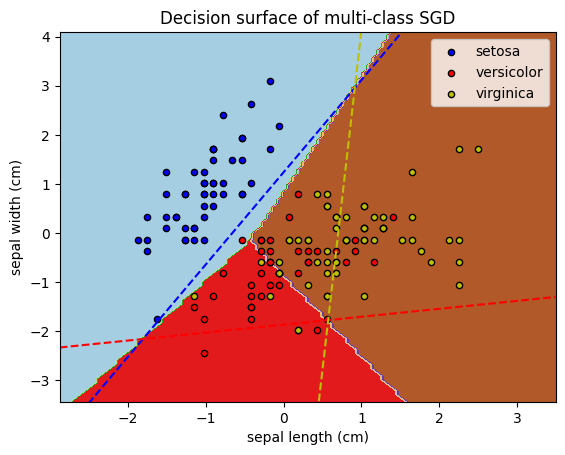

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

**Использование синтетического дататеста Iris**
1) Импорт библиотек

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


Использование встроенного датасета (Iris)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



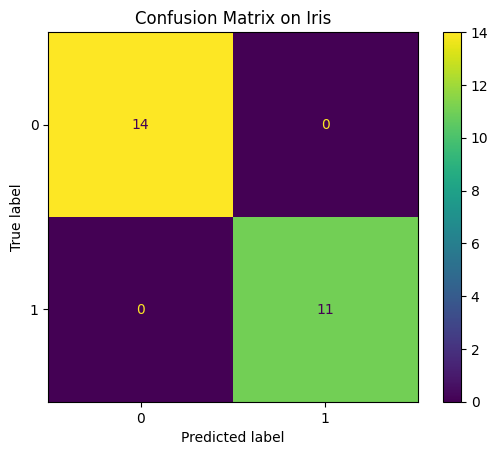

In [68]:
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target  # используем только два признака для визуализации

# Оставим только два класса (бинарная классификация)
X = X[y != 2]
y = y[y != 2]

# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train, y_train)

# Оценка
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix on Iris")
plt.show()

Что показывает данный пример. Мы работаем на датасете Iris я проверил, насколько хорошо обучаемая модель SGDClassifier угадала вид цветка по сравнению с правильными ответами.

Для этого используется отчёт classification_report, который выводит метрики:precision (точность), recall (полнота), f1-score (Среднее между precision и recall — метрика для оценки баланса) support	Сколько примеров каждого класса было в тестовой выборке. Названия цветков хранятся в iris.target_names, Они всё равно участвуют в предсказаниях, просто в classification_report они заменены номерами классов (0, 1, 2). Зачем нужен этот пример? Мы хотим знать не просто "предсказал вид или нет", а как часто модель ошибается, на каких классах, насколько серьёзны ошибки.


 **Визуализация границ принятия решений**

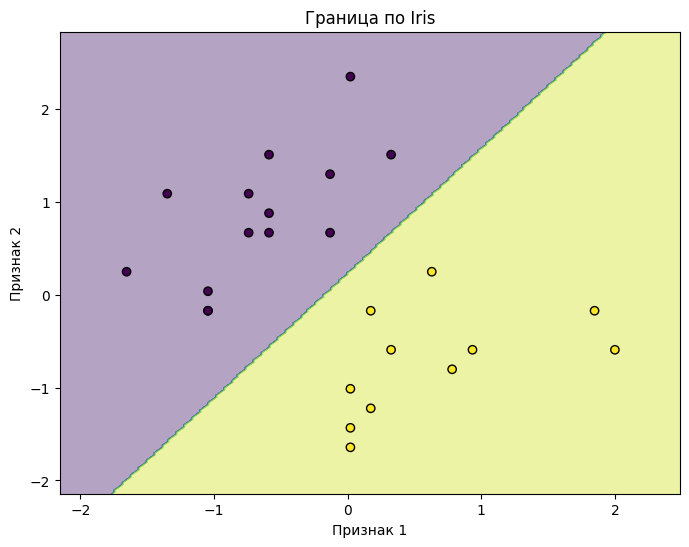

In [70]:
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #clf.predict(...) — модель предсказывает метку класса для каждой точки на плоскости.
                                                   #Мы берём 2 признака (X[:, 0] и X[:, 1]), чтобы построить 2D график.
                                                   #Эта сетка из точек xx и yy покрывает всё пространство данных.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4) #Рисуется граница решения: цветная область, показывающая, где модель думает, что данные принадлежат к одному или другому классу.
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.show()

plot_decision_boundary(clf, X_test, y_test, "Граница по Iris")

**Интерпретация результатов (датасет Iris)**

Наблюдаемые эффекты:
Модель успешно обучается различать классы цветов ириса на основе выбранных признаков (например, длина и ширина лепестков).
Метрики качества (точность, полнота, F1-оценка) показывают высокую эффективность модели, особенно для легко различимых классов.
График границы принятия решений позволяет визуально оценить, как модель разделяет пространство признаков между классами.

Практическая значимость:
Датасет Iris часто используется как эталонный пример для изучения базовых методов классификации, так как он хорошо сбалансирован и легко интерпретируется.
Анализ на этом датасете помогает понять, как различные алгоритмы (например, стохастический градиентный спуск) работают на многоклассовых задачах.
Визуализация результатов способствует лучшему пониманию внутренней логики модели и помогает выявить возможные проблемы, такие как перекрытие классов.


Зачем нужна plot_decision_boundary(...)?
Эта функция рисует, как модель разделяет классы. То есть она показывает, где проходит граница между разными классами (например, между видами цветов в Iris), которую нашла моя модель. Некоторые комментарии оставлены в коде, для его лучшего понимания.
График:
Я получил визуальное подтверждение, как хорошо (или плохо) модель разделила данные:
1)Если граница проходит между группами точек разного цвета — модель сработала хорошо.
2)Если граница граница проходит между группами точек и точки переходят через границу, другими словами точки нечетка разделены по цветам, а есть .


**Использование датасета make_blobs** 

**Импорт библиотек**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

**Генерация данных**

In [23]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0) #Генерируется 300 точек (n_samples=300).
                                                                             #Они распределены по 3 кластерам (centers=3).
                                                                             #Размер (разброс) каждого кластера — cluster_std=0.5.
                                                                             #random_state=0 нужен для повторяемости результата.

**Визуализация данных**

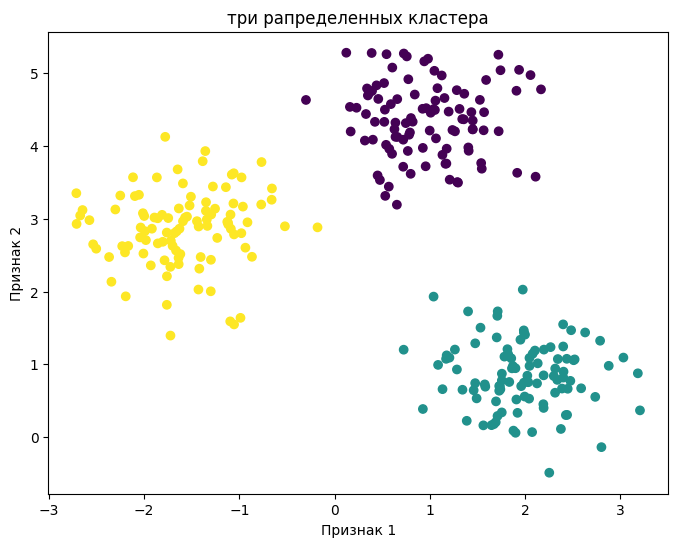

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("три рапределенных кластера")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

**Масштабирование и обучение модели**

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y) #Масштабируем данные, чтобы признаки имели единичное среднее
                                                                                                             #и стандартное отклонение (улучшает работу моделей).
                                                                                                             #Делим данные на обучение и тест (70% на обучение, 30% на тест).
clf = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Создаётся классификатор на стохастическом градиентном спуске (SGD).
#Используется логистическая регрессия (loss="log_loss").
#Модель обучается на X_train, y_train.

**Оценка качества модели**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



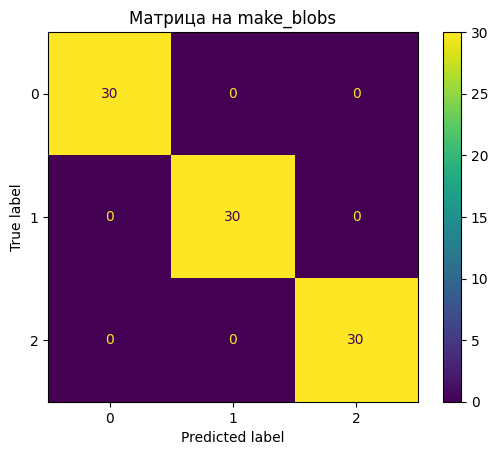

In [26]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Матрица на make_blobs")
plt.show()

Визуализация границы решений

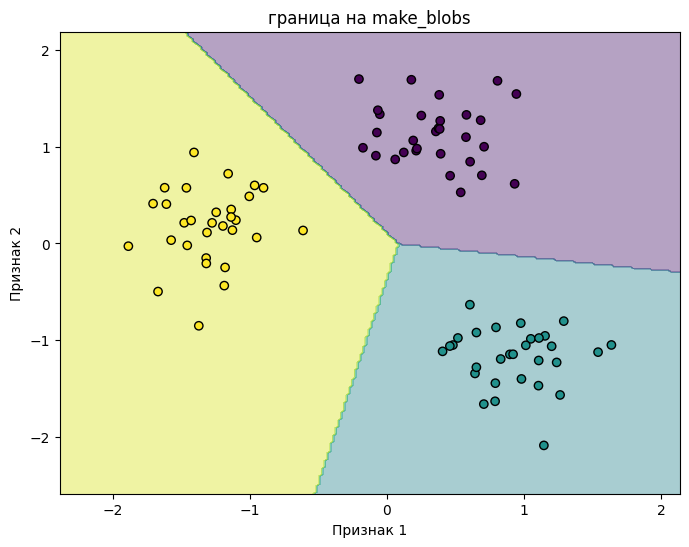

In [28]:
plot_decision_boundary(clf, X_test, y_test, "граница на make_blobs")

#Оставил комментарии в коде, для его лучшего понимания

**Интерпретация результатов (синтетический датасет make_blobs)**

Наблюдаемые эффекты:
Алгоритм эффективно обучается на синтетически сгенерированных кластерах, каждый из которых представляет отдельный класс.
Визуализация границ решений показывает, как модель проводит разделение между кластерами на основе обучающих признаков.
Границы между кластерами могут быть четкими или размытыми в зависимости от плотности, расположения и стандартного отклонения точек (параметр cluster_std).

Практическая значимость:
Использование make_blobs позволяет наглядно продемонстрировать, как классификатор (например, SGD-классификатор или логистическая регрессия) обучается различать классы.

**Использвание внешнего датасета "Dataset_Malavi_National_Footbal_Team"**



Импорт библиотек

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Загрузка и предварительный анализ данных

In [62]:
# Путь к файлу — если он в той же папке, где запущен notebook
df = pd.read_csv("Dataset_Malawi_National_Football_Team_Matches.csv")

# Посмотреть первые строки
df.head()

Date           Opponent  Team Score  Opponent Score Result    Venue  \
0       ~1957  Northern Rhodesia         0.0             5.0   Loss  Unknown   
1       ~1962              Ghana         0.0            12.0   Loss  Unknown   
2       ~1968           Botswana         8.0             1.0    Win  Unknown   
3  02/06/1996       South Africa         0.0             3.0   Loss     Away   
4  07/07/1996             Zambia         1.0             1.0   Draw     Home   

                      Competition  
0  Friendly (First International)  
1                        Friendly  
2                        Friendly  
3             World Cup Qualifier  
4                        Friendly

Подготовка признаков и целевой переменной

In [63]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Удаляем строки с ошибочными датами
df = df.dropna(subset=["Date"])

# Дальше можно продолжать анализ как обычно
df["year"] = df["Date"].dt.year
# Удалим строки с пропущенными значениями в нужных колонках
df = df.dropna(subset=["Team Score", "Opponent Score"])

# Целевая переменная: победа Малави
df["Malawi_win"] = (df["Team Score"] > df["Opponent Score"]).astype(int)

# Признаки: домашняя игра, континент соперника, год, и т.п. — упростим
df["is_home"] = df["Competition"].str.lower().str.contains("home").astype(int)
df["year"] = pd.to_datetime(df["Date"]).dt.year

# Используем только числовые признаки
features = ["Team Score", "Opponent Score", "is_home", "year"]
X = df[features]
y = df["Malawi_win"]

C:\Users\futbo\AppData\Local\Temp\ipykernel_22688\2875606193.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


Разделение и масштабирование

In [58]:
# Делим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение SGDClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         2

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



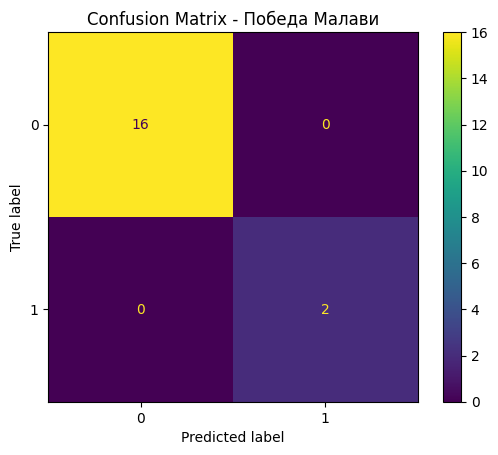

In [59]:
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_scaled, y_train)

# Предсказания и отчёт
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test)
plt.title("Confusion Matrix - Победа Малави")
plt.show()

Визуализация границы решений (с 2 признаками)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         2

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



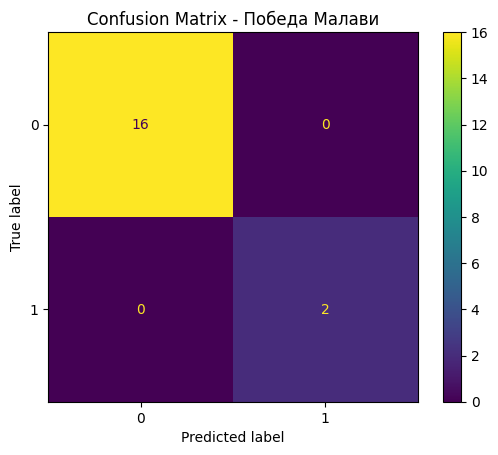

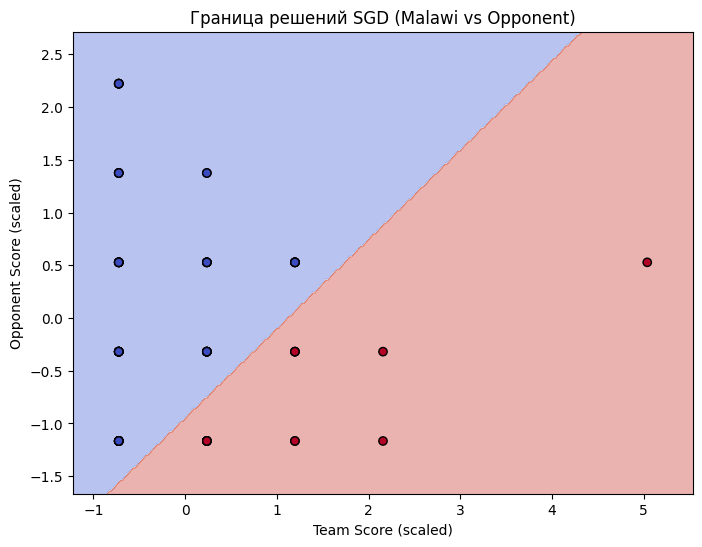

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_scaled, y_train)

# Предсказания и отчёт
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test)
plt.title("Confusion Matrix - Победа Малави")
plt.show()
# Только два признака для визуализации
X_viz = df[["Team Score", "Opponent Score"]].values
y_viz = df["Malawi_win"].values

# Масштабирование
scaler_viz = StandardScaler()
X_viz_scaled = scaler_viz.fit_transform(X_viz)

# Обучим классификатор
clf_viz = SGDClassifier(loss="hinge", alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)
clf_viz.fit(X_viz_scaled, y_viz)

# Построим границу решений
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Team Score (scaled)")
    plt.ylabel("Opponent Score (scaled)")
    plt.show()

plot_decision_boundary(clf_viz, X_viz_scaled, y_viz, "Граница решений SGD (Malawi vs Opponent)")

**Интерпретация результатов**
Наблюдаемые эффекты:
Модель на основе SGDClassifier построила линейную границу, отделяющую победы Малави от остальных исходов.
Классификация возможна даже с небольшим числом признаков, таких как счёт и место проведения.
Погрешности возможны из-за ничей, нестандартных условий матчей и других скрытых факторов.

Практическая значимость:
Такой подход может быть полезен для предварительного прогнозирования исходов матчей или анализа исторических результатов.
Метод подходит как часть большей модели предсказания, если использовать больше признаков (соперник, турнир, форма команды и т.п.).